In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [65]:
#loading the csv data
crypto_df=pd.read_csv("Resources/crypto_data.csv")

In [66]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [68]:
#value counts for total coin supply
crypto_df['TotalCoinSupply'].value_counts()

0             92
21000000      64
100000000     62
1000000000    43
50000000      23
              ..
39200000       1
270875968      1
9736000        1
3652422000     1
233100000      1
Name: TotalCoinSupply, Length: 546, dtype: int64

In [27]:
crypto_df=crypto_df[crypto_df['IsTrading']==True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [28]:
#Discarding all cryptocurrencies that are not being traded
crypto_df.drop('IsTrading', axis=1, inplace=True)

/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [31]:
#looking for nan value
crypto_df.isna().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [32]:
#Filtering the  cryptocurrencies that have been mined
crypto_df=crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [33]:
#looking for nan value
crypto_df.isna().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [34]:
 # deleting the CoinName from the original dataframe
crypto_df.drop(['CoinName','Unnamed: 0'], axis=1, inplace=True)

/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
#converting the  features with text values, Algorithm and ProofType, into numerical data
final_df=pd.get_dummies(crypto_df)

In [41]:
#Standardizing  dataset
std_scr=StandardScaler()
scaled_data=std_scr.fit_transform(final_df)
scaled_data.shape

(532, 377)

## Dimensionality Reduction

In [45]:
# dimensionality reduction with PCA
pca=PCA(n_components=0.90)
pca_data=pca.fit_transform(scaled_data)
pca_data.shape

(532, 274)

In [70]:
pca.explained_variance_ratio_

array([0.00839215, 0.00799006, 0.00797255, 0.00797255, 0.00794421,
       0.00741891, 0.00696609, 0.00687449, 0.00656659, 0.0061131 ,
       0.00588744, 0.00575784, 0.00569   , 0.00555906, 0.00549437,
       0.00532247, 0.00532026, 0.00531503, 0.00531503, 0.00531503,
       0.00531503, 0.00531503, 0.00531503, 0.00531488, 0.00531089,
       0.00527432, 0.00523105, 0.00521782, 0.00508932, 0.00501107,
       0.00498244, 0.00496689, 0.0049616 , 0.00491607, 0.00487546,
       0.00485005, 0.00483744, 0.00482475, 0.00478222, 0.00475574,
       0.00466862, 0.00465538, 0.00462004, 0.00460902, 0.0045821 ,
       0.0045637 , 0.00456113, 0.00454578, 0.00454094, 0.00453147,
       0.00448855, 0.00447791, 0.00446873, 0.00440764, 0.00439661,
       0.00427716, 0.00424332, 0.00418783, 0.00405474, 0.00401174,
       0.00393489, 0.00380768, 0.00379098, 0.00377029, 0.00374979,
       0.00364987, 0.00358469, 0.00355848, 0.00349388, 0.00344452,
       0.00340763, 0.00316666, 0.00298865, 0.00276281, 0.00270

In [76]:
df_pca=pd.DataFrame(data=pca_data)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-2.757328e-15,2.186894e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,3.171457e-01,-8.361316e-01,2.502189e-01,-7.177191e-01,1.519058e+00,-9.226036e-01,7.548178e-01,1.251521e+00,6.828822e-01,-1.509471e+00
1,-0.249925,-0.117273,-3.250167e-15,1.058796e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,1.181194e+00,3.964897e-01,2.636099e+00,-9.936792e-01,-6.661969e-01,-4.202546e-01,-8.495283e-01,-6.730102e-01,-1.973161e+00,1.702251e+00
2,0.314746,-0.002862,2.447137e-16,2.009568e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,-6.648966e-01,2.576352e+00,-1.033072e+00,9.565872e-02,1.041433e+00,6.092059e-01,-4.858294e-02,1.138371e+00,1.676535e+00,-2.715599e+00
3,-0.250886,-0.222136,5.905327e-15,1.477623e-17,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,-2.251520e-15,-3.961123e-16,-1.058803e-15,1.335393e-15,1.001232e-16,2.019359e-15,4.078768e-15,9.136240e-16,-2.490564e-16,1.838512e-15
4,-0.119293,-0.222472,2.250542e-15,1.656100e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,7.947277e-16,2.282809e-15,1.551909e-15,4.205174e-16,2.503080e-16,-5.534739e-16,-2.941118e-16,-1.727125e-15,1.193969e-15,1.802217e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.602672,-0.203134,3.242126e-15,-1.476194e-15,-0.913040,-0.019244,0.019153,-0.297784,1.015249,0.126952,...,-9.932219e-14,7.577322e-14,1.321626e-13,8.047901e-14,-6.734285e-14,1.656438e-13,8.426367e-14,-5.478740e-14,-2.539124e-13,-1.605175e-13
528,-0.271168,-0.161349,-1.996524e-15,2.136227e-15,0.019795,0.729069,-0.233505,0.138658,-1.501108,-0.413621,...,-9.235362e-14,2.481052e-14,1.356669e-14,4.109055e-14,8.510470e-15,-1.701694e-13,1.572435e-13,3.554373e-15,-8.872916e-14,2.323859e-13
529,-0.066719,-0.311212,8.306804e-15,-1.672942e-15,-0.066832,-3.029865,0.403064,0.017708,0.323593,0.148218,...,1.312449e-01,-2.536556e+00,4.925928e+00,-1.637286e+00,-2.269816e+00,-2.607256e-01,2.361707e+00,-1.781668e+00,2.219370e+00,1.408602e+00
530,-0.290508,-0.245950,7.753269e-15,-3.137772e-15,0.010226,-2.124422,0.240789,-0.057882,0.446036,0.262551,...,-1.982439e-15,-4.405420e-16,2.402956e-16,-3.103819e-16,-2.372919e-15,2.031249e-15,1.772180e-15,-8.109978e-16,9.211333e-16,-1.491835e-15


In [46]:
# further reducing the dataset dimensions with t-SNE
tsne=TSNE(learning_rate=35)

In [47]:
tsne_features=tsne.fit_transform(pca_data)

In [48]:
tsne_features.shape

(532, 2)

In [49]:
x=tsne_features[:,0]
y=tsne_features[:,1]

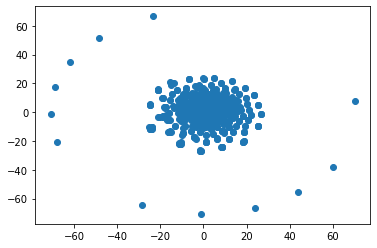

In [53]:
#scatter plot of the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [82]:
df_tsne=pd.DataFrame(data=tsne_features)
df_tsne

,0,1
0,-4.117813,-0.448029
1,-7.222873,1.990104
2,-9.634562,8.660345
3,7.655722,1.238270
4,-9.945184,-5.167763
...,...,...
527,-20.893705,16.010715
528,25.352980,-9.262728
529,15.601269,1.900085
530,13.128266,-2.884919


## Cluster Analysis with k-Means

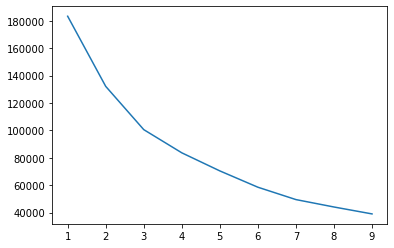

In [62]:
inertia=[]
for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(tsne_features)
    inertia.append(model.inertia_)
plt.plot(range(1,10), inertia)
plt.show()

In [63]:
# Identify the best number of clusters using the elbow curve
model=KMeans(n_clusters=6)
model.fit(tsne_features)

KMeans(n_clusters=6)

In [64]:
model.predict(tsne_features)

array([5, 5, 1, 5, 0, 0, 4, 1, 0, 2, 5, 2, 4, 2, 5, 2, 0, 2, 5, 5, 1, 5,
       5, 2, 5, 5, 1, 0, 5, 5, 2, 0, 5, 1, 5, 0, 1, 2, 5, 2, 5, 5, 1, 1,
       5, 2, 5, 2, 5, 1, 5, 5, 4, 5, 2, 0, 5, 1, 4, 1, 5, 4, 5, 5, 1, 5,
       5, 5, 1, 5, 0, 5, 5, 5, 2, 5, 5, 5, 5, 1, 5, 0, 4, 4, 4, 5, 5, 5,
       5, 0, 1, 0, 2, 1, 1, 2, 1, 5, 2, 4, 5, 0, 5, 5, 0, 5, 5, 5, 1, 2,
       0, 2, 5, 4, 5, 1, 0, 1, 1, 5, 0, 4, 5, 5, 5, 2, 5, 1, 4, 2, 2, 0,
       5, 1, 5, 2, 5, 0, 0, 1, 5, 5, 5, 5, 2, 0, 5, 4, 5, 0, 2, 2, 5, 4,
       5, 0, 1, 5, 0, 1, 1, 4, 3, 0, 0, 4, 5, 5, 5, 0, 5, 5, 1, 1, 5, 5,
       1, 4, 5, 1, 0, 0, 4, 5, 5, 4, 5, 1, 5, 1, 5, 5, 4, 1, 2, 1, 5, 5,
       0, 1, 1, 5, 1, 2, 0, 2, 1, 1, 4, 5, 1, 5, 0, 5, 4, 5, 0, 0, 0, 4,
       1, 5, 0, 4, 2, 4, 5, 5, 5, 1, 1, 4, 4, 2, 0, 5, 5, 0, 5, 5, 1, 1,
       5, 5, 1, 5, 2, 5, 5, 2, 5, 5, 5, 4, 5, 2, 1, 5, 0, 1, 0, 5, 5, 5,
       5, 4, 5, 1, 5, 1, 1, 4, 5, 5, 1, 1, 0, 1, 1, 1, 1, 4, 5, 1, 1, 5,
       1, 5, 0, 5, 0, 2, 1, 5, 5, 2, 3, 4, 1, 5, 5,

In [78]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [83]:
clusters=get_clusters(6,df_pca )
clusters

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,class
0,-0.267092,-0.116294,-2.757328e-15,2.186894e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,-8.361316e-01,2.502189e-01,-7.177191e-01,1.519058e+00,-9.226036e-01,7.548178e-01,1.251521e+00,6.828822e-01,-1.509471e+00,2
1,-0.249925,-0.117273,-3.250167e-15,1.058796e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,3.964897e-01,2.636099e+00,-9.936792e-01,-6.661969e-01,-4.202546e-01,-8.495283e-01,-6.730102e-01,-1.973161e+00,1.702251e+00,2
2,0.314746,-0.002862,2.447137e-16,2.009568e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,2.576352e+00,-1.033072e+00,9.565872e-02,1.041433e+00,6.092059e-01,-4.858294e-02,1.138371e+00,1.676535e+00,-2.715599e+00,2
3,-0.250886,-0.222136,5.905327e-15,1.477623e-17,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,-3.961123e-16,-1.058803e-15,1.335393e-15,1.001232e-16,2.019359e-15,4.078768e-15,9.136240e-16,-2.490564e-16,1.838512e-15,2
4,-0.119293,-0.222472,2.250542e-15,1.656100e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,2.282809e-15,1.551909e-15,4.205174e-16,2.503080e-16,-5.534739e-16,-2.941118e-16,-1.727125e-15,1.193969e-15,1.802217e-16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.602672,-0.203134,3.242126e-15,-1.476194e-15,-0.913040,-0.019244,0.019153,-0.297784,1.015249,0.126952,...,7.577322e-14,1.321626e-13,8.047901e-14,-6.734285e-14,1.656438e-13,8.426367e-14,-5.478740e-14,-2.539124e-13,-1.605175e-13,2
528,-0.271168,-0.161349,-1.996524e-15,2.136227e-15,0.019795,0.729069,-0.233505,0.138658,-1.501108,-0.413621,...,2.481052e-14,1.356669e-14,4.109055e-14,8.510470e-15,-1.701694e-13,1.572435e-13,3.554373e-15,-8.872916e-14,2.323859e-13,3
529,-0.066719,-0.311212,8.306804e-15,-1.672942e-15,-0.066832,-3.029865,0.403064,0.017708,0.323593,0.148218,...,-2.536556e+00,4.925928e+00,-1.637286e+00,-2.269816e+00,-2.607256e-01,2.361707e+00,-1.781668e+00,2.219370e+00,1.408602e+00,2
530,-0.290508,-0.245950,7.753269e-15,-3.137772e-15,0.010226,-2.124422,0.240789,-0.057882,0.446036,0.262551,...,-4.405420e-16,2.402956e-16,-3.103819e-16,-2.372919e-15,2.031249e-15,1.772180e-15,-8.109978e-16,9.211333e-16,-1.491835e-15,2


In [84]:
clusters=get_clusters(6,df_tsne )
clusters

,0,1,class
0,-4.117813,-0.448029,3
1,-7.222873,1.990104,3
2,-9.634562,8.660345,1
3,7.655722,1.238270,3
4,-9.945184,-5.167763,4
...,...,...,...
527,-20.893705,16.010715,1
528,25.352980,-9.262728,5
529,15.601269,1.900085,5
530,13.128266,-2.884919,5


In [87]:
 def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.show()

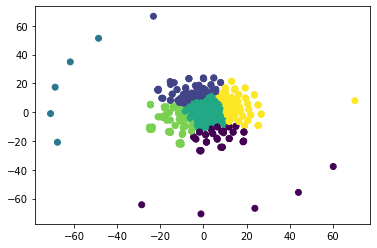

In [88]:
show_clusters(clusters)